# Student Depression Model Selecttion

## Table of Contents

- [Student Depression](#student-depression)
  - [Table of Contents](#table-of-contents)
- [Functions](#functions)
- [Classes](#classes)
- [Load Data](#load-data)
- [Stratified Shuffle Split](#stratified-shuffle-split)
- [Encode Data](#encode-data)
- [Data Preprocessing and Cleaning](#data-preprocessing-and-cleaning)
- [Prepare Data for ML Algorithms](#prepare-data-for-ml-algorithms)
- [Data Pipeline](#data-pipeline)
- [Comparing Different ML Models](#comparing-different-ml-models)
  - [Linear Models](#linear-models)
    - [Logistic Regression](#logistic-regression)
  - [Tree-Based Models](#tree-based-models)
    - [Decision Tree](#decision-tree)
    - [Random Forest](#random-forest)
    - [Gradient Boosting: XGBoost](#gradient-boosting-xgboost)
    - [Gradient Boosting: LightGBM](#gradient-boosting-lightgbm)
    - [Gradient Boosting: CatBoost](#gradient-boosting-catboost)
  - [Bayesian Algorithms](#bayesian-algorithms)
    - [Gaussian Naive Bayes](#gaussian-naive-bayes)
    - [Multinomial Naive Bayes](#multinomial-naive-bayes)
    - [Bernoulli Naive Bayes](#bernoulli-naive-bayes)
  - [Compare ML Models Performance](#compare-ml-models-performance)



# Functions

In [421]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_and_histogram(dataframe, column_name, bins=10, save_path="images"):
    """
    Plots a box plot and histogram for a numerical column, saves them as separate images, and displays them.

    Parameters:
        dataframe (DataFrame): The dataset containing the column.
        column_name (str): The numerical column to plot.
        bins (int): Number of bins for the histogram.
        save_path (str): Directory where the images will be saved.
    """

    # Check if the column exists in the data
    if column_name not in dataframe.columns:
        raise ValueError(f"Column '{column_name}' not found in the dataset.")

    column_data = dataframe[column_name].dropna()  # Remove NaN values
    if column_data.empty:
        raise ValueError(f"No valid data found in column '{column_name}'.")

    # Calculate statistics
    mean_val = column_data.mean()
    median_val = column_data.median()
    mode_val = column_data.mode()[0]
    
    # Create 'images' directory if it does not exist
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Define filenames for the saved images
    boxplot_filename = os.path.join(save_path, f"{column_name}_boxplot.png")
    histogram_filename = os.path.join(save_path, f"{column_name}_histogram.png")

    # Create and save Box Plot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=column_data, color='skyblue')
    plt.title(f'Box Plot for {column_name}')
    plt.xlabel(column_name)
    plt.savefig(boxplot_filename, dpi=300)
    plt.show()

    # Create and save Histogram
    plt.figure(figsize=(6, 4))
    plt.hist(column_data, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram for {column_name}')
    plt.axvline(mean_val, color='purple', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='magenta', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='red', linestyle='-', label=f'Mode: {mode_val:.2f}')
    plt.legend()
    plt.savefig(histogram_filename, dpi=300)
    plt.show()

    print(f"Box plot saved successfully at: {boxplot_filename}")
    print(f"Histogram saved successfully at: {histogram_filename}")



In [422]:
import os
import matplotlib.pyplot as plt

def plot_categorical_bar_chart(data, column, mapping_dict, save_path="images"):
    """
    Plots a bar chart for a categorical column, maps values using a dictionary, 
    saves the chart as an image, and displays it.

    Parameters:
        data (DataFrame): The dataset containing the column.
        column (str): The categorical column to plot.
        mapping_dict (dict): Dictionary mapping category names to numerical values.
        save_path (str): Directory where the image will be saved.
    """

    # Check if the column exists in the data
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in the dataset.")

    # Reverse the mapping dictionary (numerical values -> category names)
    reverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

    # Map the column using the reversed mapping dictionary
    mapped_category = data[column].map(reverse_mapping_dict)

    # Handle unmapped values
    if mapped_category.isnull().any():
        raise ValueError("Some values in the column do not have corresponding keys in the mapping dictionary.")

    # Count the occurrences of each category
    category_counts = mapped_category.value_counts()

    # Create the 'images' directory if it does not exist
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    # Define the filename for the saved image
    image_filename = os.path.join(save_path, f"{column}_bar_chart.png")

    # Plot the bar chart
    plt.figure(figsize=(6, 4))
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart for {column}", fontsize=16)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()

    # Save the figure
    plt.savefig(image_filename, dpi=300)

    # Display the plot
    plt.show()

    print(f"Bar chart saved successfully at: {image_filename}")


In [423]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(depression_labels, predictions, average='binary'):
    precision = precision_score(depression_labels, predictions, average=average)
    recall = recall_score(depression_labels, predictions, average=average)
    f1 = f1_score(depression_labels, predictions, average=average)

    # Print results
    print(f"Precision: {precision:.8f}")
    print(f"Recall:    {recall:.8f}")
    print(f"F1 Score:  {f1:.8f}")

In [424]:
import pandas as pd

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer, fbeta_score, roc_curve, roc_auc_score

def evaluate_model_cross_val(model, model_name, X, y):
    """
    Evaluate the model using 10-fold cross-validation, but only measure 
    an F-measure that emphasizes recall (F2).
    """
    # Create a custom scorer for F2
    f2_scorer = make_scorer(fbeta_score, beta=2)
    
    # Perform cross-validation using the F2 scorer
    f2_scores = cross_val_score(model, X, y, cv=10, scoring=f2_scorer)
    
    # Get cross-validated predicted probabilities (for ROC curve / AUC)
    y_prob = cross_val_predict(model, X, y, cv=10, method='predict_proba')[:, 1]
    
    # Compute ROC AUC score
    roc_auc = roc_auc_score(y, y_prob)
    
    # Compute ROC curve (optional, if you still want to use it)
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    
    print(f"F2 Score (Emphasizing Recall): {f2_scores.mean():.4f}")
    print(f"ROC AUC:                        {roc_auc:.4f}")

    return pd.DataFrame([{
        "Model": model_name,
        "F2 Score": f2_scores.mean(),
        "ROC AUC": roc_auc
    }])

# Classes

In [425]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping):
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, (pd.Series, pd.DataFrame)):
            raise ValueError("Input must be a pandas Series or DataFrame.")
        
        # If input is a Series, work directly
        if isinstance(X, pd.Series):
            X_transformed = X.replace(self.mapping)
            return X_transformed.values.reshape(-1, 1)
        
        # If input is a DataFrame, assume only one column is passed for transformation
        if X.shape[1] != 1:
            raise ValueError("DataFrame input must have exactly one column for this transformer.")
        
        column_name = X.columns[0]
        X_transformed = X[column_name].replace(self.mapping)
        return X_transformed.values.reshape(-1, 1)

In [426]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class AgeBinner(BaseEstimator, TransformerMixin):
    def __init__(self, bins=None, labels=None):
        self.bins = bins if bins else [0, 19, 24, 29, 34, 100]
        self.labels = labels if labels else ["Teenager (18-19)", "Young Adult (20-24)", 
                                             "Early Career (25-29)", "Mid-Career (30-34)", "Established (35+)"]

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        # Ensure X is a 1D array
        if isinstance(X, np.ndarray) and X.ndim > 1:
            X = X[:, 0]

        # Apply binning using pd.cut
        binned_ages = pd.cut(X, bins=self.bins, labels=self.labels, right=False)

        # Convert to a NumPy array and reshape to 2D for OneHotEncoder
        return np.array(binned_ages).reshape(-1, 1)  


# Load Data

In [427]:
import pandas as pd

file_path = r"/Users/valerian/Desktop/Jupyter/DT2/Student Depression Dataset.csv"
dataframe = pd.read_csv(file_path)

# Define a dictionary to map old column names to new, shorter, lowercase names
column_mapping = {
    'id': 'id',
    'Gender': 'gender',
    'Age': 'age',
    'City': 'city',
    'Profession': 'prof',
    'Academic Pressure': 'acad_press',
    'Work Pressure': 'work_press',
    'CGPA': 'cgpa',
    'Study Satisfaction': 'study_sat',
    'Job Satisfaction': 'job_sat',
    'Sleep Duration': 'sleep_dur',
    'Dietary Habits': 'diet_habits',
    'Degree': 'degree',
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Work/Study Hours': 'work_hours',
    'Financial Stress': 'fin_stress',
    'Family History of Mental Illness': 'fam_hist_mental',
    'Depression': 'depression'
}
# Remove extra spaces from all columns in the DataFrame
dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)

dataframe.columns = dataframe.columns.str.strip()  # Strips leading and trailing
initial_size = dataframe.shape[0]
dataframe.rename(columns=column_mapping, inplace=True)
dataframe.head(4)

/var/folders/m1/qxpcclg55hg_8gcmt4vpkrq80000gn/T/ipykernel_24264/3999747343.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,id,gender,age,city,prof,acad_press,work_press,cgpa,study_sat,job_sat,sleep_dur,diet_habits,degree,suicidal_thoughts,work_hours,fin_stress,fam_hist_mental,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1


In [428]:
print(dataframe.isnull().sum())

id                   0
gender               0
age                  0
city                 0
prof                 0
acad_press           0
work_press           0
cgpa                 0
study_sat            0
job_sat              0
sleep_dur            0
diet_habits          0
degree               0
suicidal_thoughts    0
work_hours           0
fin_stress           0
fam_hist_mental      0
depression           0
dtype: int64


# Stratified Shuffle Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit


dataframe['stratify_column'] = (
    dataframe['gender'].astype(str) + '_' +
    dataframe['suicidal_thoughts'].astype(str) + '_' +
    dataframe['fam_hist_mental'].astype(str) + '_' +
    dataframe['depression'].astype(str)
)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataframe, dataframe['stratify_column']):  # Stratify based on 'gender'
    strat_train_set = dataframe.iloc[train_index].copy()
    strat_test_set = dataframe.iloc[test_index].copy()


strat_train_set.drop(columns=['stratify_column'], inplace=True)
strat_test_set.drop(columns=['stratify_column'], inplace=True)

dep = strat_train_set.copy()

# Encode Data

## Encode Gender

In [430]:
gender_mapping = {
    'Male': 2,
    'Female': 3
}

dep['gender'] = dep['gender'].replace(gender_mapping)
dep['gender'].value_counts()

/var/folders/m1/qxpcclg55hg_8gcmt4vpkrq80000gn/T/ipykernel_24264/31958872.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dep['gender'] = dep['gender'].replace(gender_mapping)


gender
2    12436
3     9884
Name: count, dtype: int64

## Ecnode Sleep

In [431]:
dep['sleep_dur'].value_counts()

sleep_dur
Less than 5 hours    6624
7-8 hours            5897
5-6 hours            4961
More than 8 hours    4823
Others                 15
Name: count, dtype: int64

In [432]:
sleep_dur_mapping = {
    'Less than 5 hours': 2,
    '5-6 hours': 3,
    '7-8 hours': 4,
    'More than 8 hours': 5,
    'Others': 6
}

dep['sleep_dur'] = dep['sleep_dur'].replace(sleep_dur_mapping)
dep['sleep_dur'].value_counts()

/var/folders/m1/qxpcclg55hg_8gcmt4vpkrq80000gn/T/ipykernel_24264/110787873.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dep['sleep_dur'] = dep['sleep_dur'].replace(sleep_dur_mapping)


sleep_dur
2    6624
4    5897
3    4961
5    4823
6      15
Name: count, dtype: int64

## Encode Dietary Habits

In [433]:
dep['diet_habits'].value_counts()

diet_habits
Unhealthy    8242
Moderate     7860
Healthy      6210
Others          8
Name: count, dtype: int64

In [434]:
diet_habits_mapping = {
    'Unhealthy' : 2,
    'Moderate' : 3,
    'Healthy' : 4,
    'Others': 5
}

dep['diet_habits'] = dep['diet_habits'].replace(diet_habits_mapping)
# dep = dep.drop(dep[dep['diet_habits'] == 'Others'].index) 
dep['diet_habits'].value_counts()

/var/folders/m1/qxpcclg55hg_8gcmt4vpkrq80000gn/T/ipykernel_24264/4275024347.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dep['diet_habits'] = dep['diet_habits'].replace(diet_habits_mapping)


diet_habits
2    8242
3    7860
4    6210
5       8
Name: count, dtype: int64

## Encode Suicidal Thoughts

In [435]:
suicidal_thoughts_mapping = {
    'Yes' : 1,
    'No' : 0
}

dep['suicidal_thoughts'] = dep['suicidal_thoughts'].replace(suicidal_thoughts_mapping)
dep = dep.drop(dep[dep['suicidal_thoughts'] == 'Others'].index) # Remove all non students 
dep['suicidal_thoughts'].value_counts()

/var/folders/m1/qxpcclg55hg_8gcmt4vpkrq80000gn/T/ipykernel_24264/4023902023.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dep['suicidal_thoughts'] = dep['suicidal_thoughts'].replace(suicidal_thoughts_mapping)


suicidal_thoughts
1    14124
0     8196
Name: count, dtype: int64

## Encode Financial Stress

In [436]:
dep['fin_stress'] = pd.to_numeric(dep['fin_stress'], errors='coerce')  # Convert to numeric, setting invalid parsing to NaN
dep['fin_stress'] = dep['fin_stress'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

## Encode Family History of Mental Illness

In [437]:
fam_hist_mental_mapping = {
    'Yes' : 1,
    'No' : 0
}

dep['fam_hist_mental'] = dep['fam_hist_mental'].replace(fam_hist_mental_mapping)
# dep = dep.drop(dep[dep['fam_hist_mental'] == 'Others'].index) # Remove all non students 
dep['fam_hist_mental'].value_counts()

/var/folders/m1/qxpcclg55hg_8gcmt4vpkrq80000gn/T/ipykernel_24264/2955752780.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dep['fam_hist_mental'] = dep['fam_hist_mental'].replace(fam_hist_mental_mapping)


fam_hist_mental
0    11519
1    10801
Name: count, dtype: int64

## Encode Academic pressure

In [438]:
# dep = dep.drop(dep[dep['acad_press'] == 'Others'].index) # Remove all non students 
dep['acad_press'].value_counts()

acad_press
3.0    6000
5.0    5056
4.0    4086
1.0    3835
2.0    3336
0.0       7
Name: count, dtype: int64

In [439]:
depression_mapping = {
    'Yes' : 1,
    'No' : 0
}

# Data prepossessing and cleaning

## Drop duplicates

## Remove all non students

In [442]:
dep['prof'].value_counts()

prof
Student                   22298
Architect                     6
Teacher                       4
Chef                          2
Content Writer                2
Entrepreneur                  1
Digital Marketer              1
Lawyer                        1
UX/UI Designer                1
Doctor                        1
Educational Consultant        1
Pharmacist                    1
Manager                       1
Name: count, dtype: int64

In [443]:
dep.loc[dep['prof'] != 'Student', 'prof'] = None
dep['prof'].value_counts()

prof
Student    22298
Name: count, dtype: int64

## Look into profession

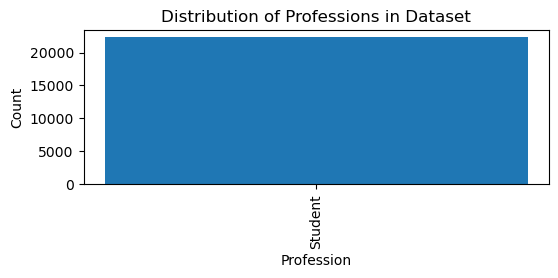

prof
Student    22298
Name: count, dtype: int64


In [444]:
import matplotlib.pyplot as plt

# Count occurrences of each profession
prof_counts = dep['prof'].value_counts()

# Plot the bar chart
plt.figure(figsize=(6,2))
plt.bar(prof_counts.index, prof_counts.values)
plt.xlabel("Profession")
plt.ylabel("Count")
plt.title("Distribution of Professions in Dataset")
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()
print(prof_counts)


## Look at gender

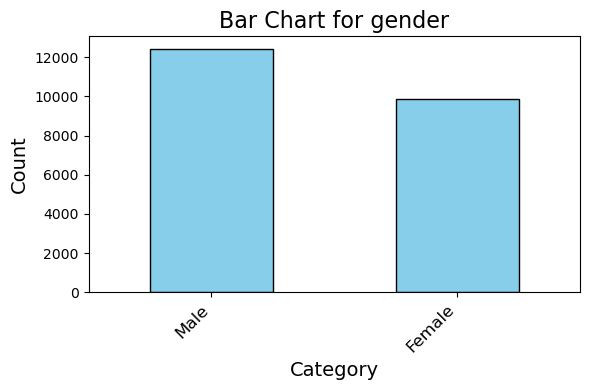

Bar chart saved successfully at: images/gender_bar_chart.png


In [445]:
plot_categorical_bar_chart(dep, 'gender', gender_mapping)

## Look into age

In [446]:
dep['age'].describe()

count    22320.000000
mean        25.834543
std          4.907852
min         18.000000
25%         21.000000
50%         26.000000
75%         30.000000
max         59.000000
Name: age, dtype: float64

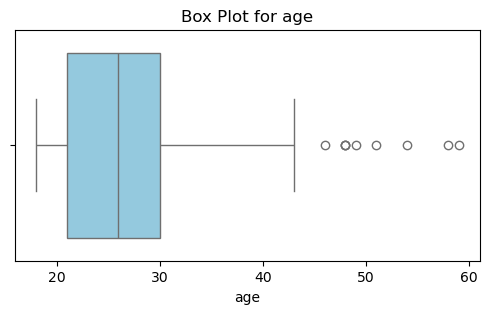

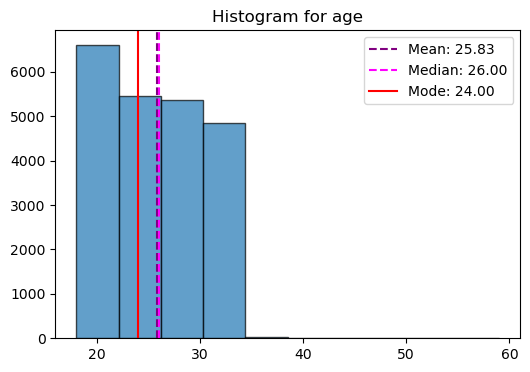

Box plot saved successfully at: images/age_boxplot.png
Histogram saved successfully at: images/age_histogram.png


In [447]:
plot_box_and_histogram(dep, 'age', bins=10)

## Look into academic pressure

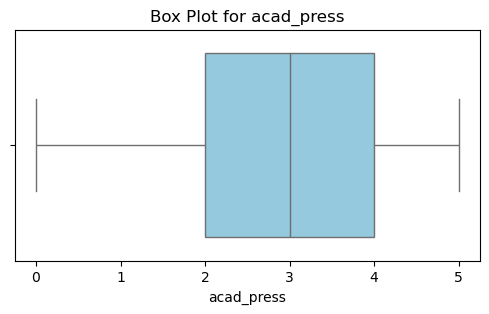

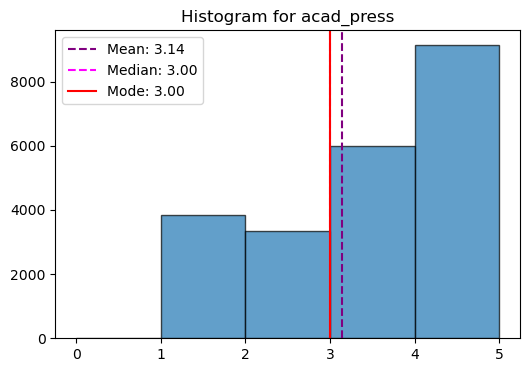

Box plot saved successfully at: images/acad_press_boxplot.png
Histogram saved successfully at: images/acad_press_histogram.png


In [448]:
plot_box_and_histogram(dep, 'acad_press', bins=5)


## Look into work pressure

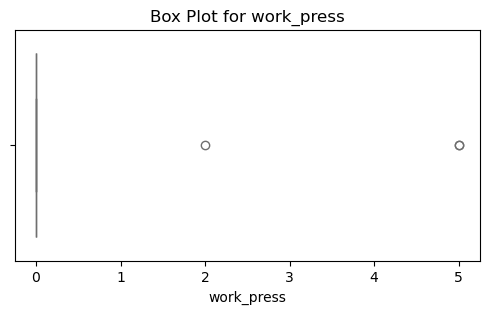

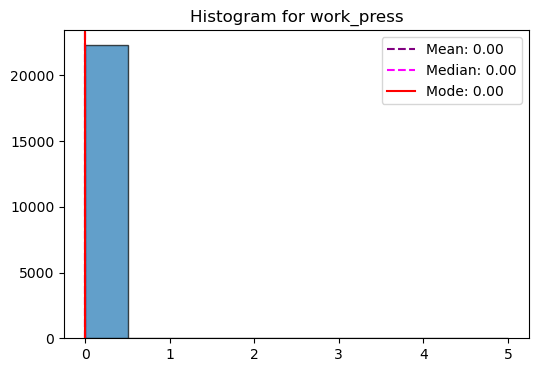

Box plot saved successfully at: images/work_press_boxplot.png
Histogram saved successfully at: images/work_press_histogram.png


In [449]:
plot_box_and_histogram(dep, 'work_press', bins=10)

In [450]:
dep = dep.drop('work_press', axis=1)


## Look into CGPA

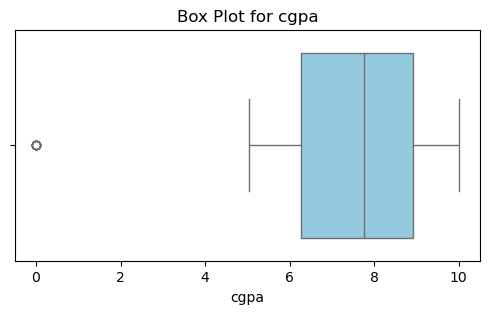

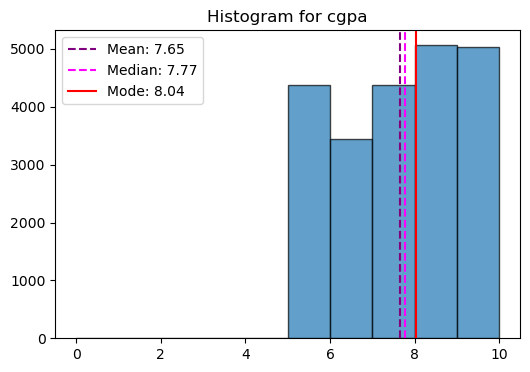

Box plot saved successfully at: images/cgpa_boxplot.png
Histogram saved successfully at: images/cgpa_histogram.png


In [451]:
plot_box_and_histogram(dep, 'cgpa', bins=10)

## Look into study satisfaction

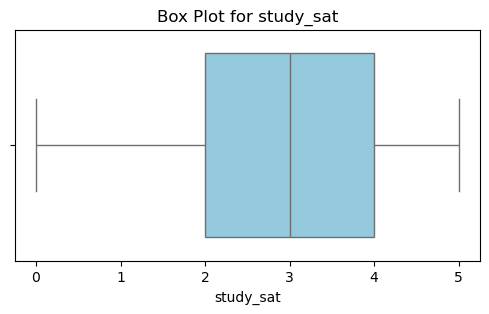

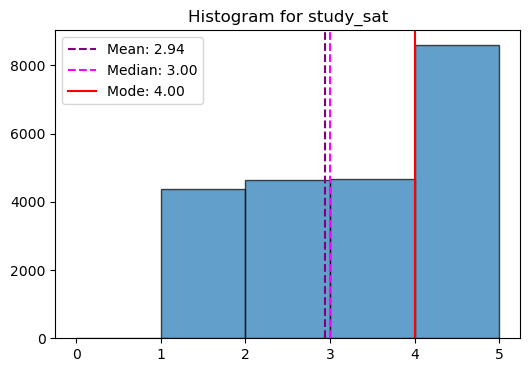

Box plot saved successfully at: images/study_sat_boxplot.png
Histogram saved successfully at: images/study_sat_histogram.png


In [452]:
plot_box_and_histogram(dep, 'study_sat', bins=5)

## Look into job satisfaction

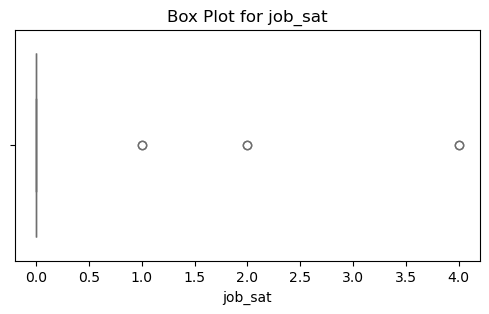

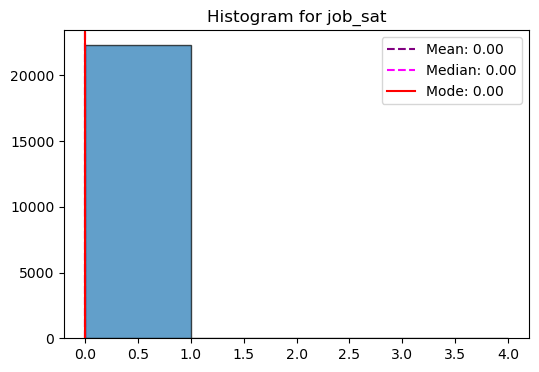

Box plot saved successfully at: images/job_sat_boxplot.png
Histogram saved successfully at: images/job_sat_histogram.png


In [453]:
plot_box_and_histogram(dep, 'job_sat', bins=4)

## Look into sleep

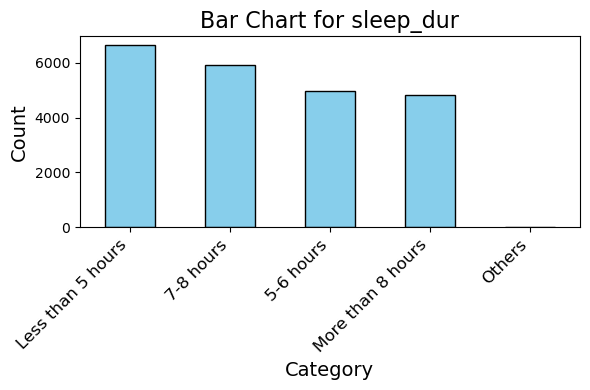

Bar chart saved successfully at: images/sleep_dur_bar_chart.png


In [454]:
# dep = dep.drop(dep[dep['sleep_dur'] == 6].index) 
plot_categorical_bar_chart(dep, 'sleep_dur', sleep_dur_mapping)

## Look into diet

In [455]:
dep['diet_habits'].value_counts()

diet_habits
2    8242
3    7860
4    6210
5       8
Name: count, dtype: int64

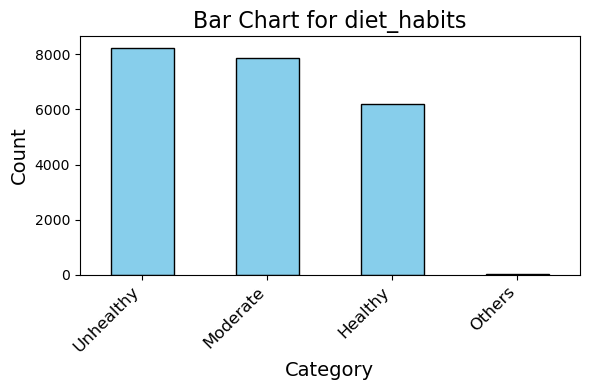

Bar chart saved successfully at: images/diet_habits_bar_chart.png


In [456]:
plot_categorical_bar_chart(dep, 'diet_habits', diet_habits_mapping)

## Look into suicidal thoughts

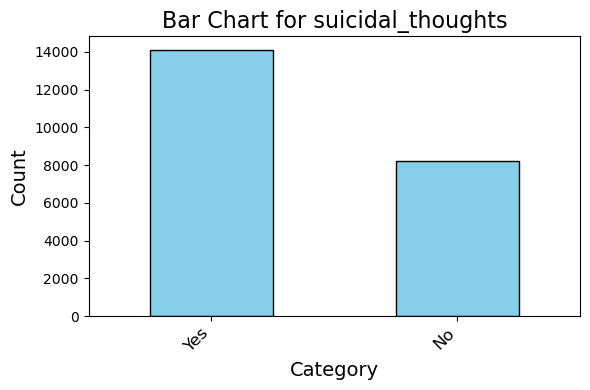

Bar chart saved successfully at: images/suicidal_thoughts_bar_chart.png


In [457]:
plot_categorical_bar_chart(dep, 'suicidal_thoughts', suicidal_thoughts_mapping)

## Look into financial stress

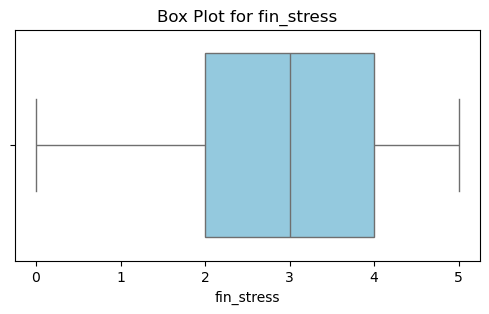

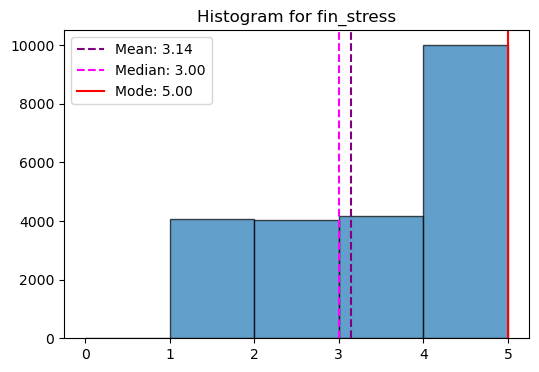

Box plot saved successfully at: images/fin_stress_boxplot.png
Histogram saved successfully at: images/fin_stress_histogram.png


In [458]:
plot_box_and_histogram(dep, 'fin_stress', bins=5)

## Look into Family History of Mental Illness

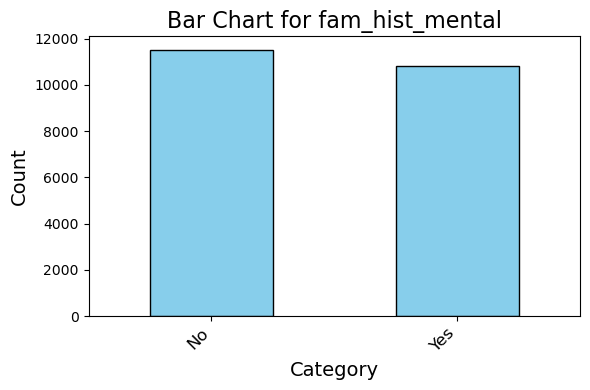

Bar chart saved successfully at: images/fam_hist_mental_bar_chart.png


In [459]:
plot_categorical_bar_chart(dep, 'fam_hist_mental', fam_hist_mental_mapping)

## Look into derepssion

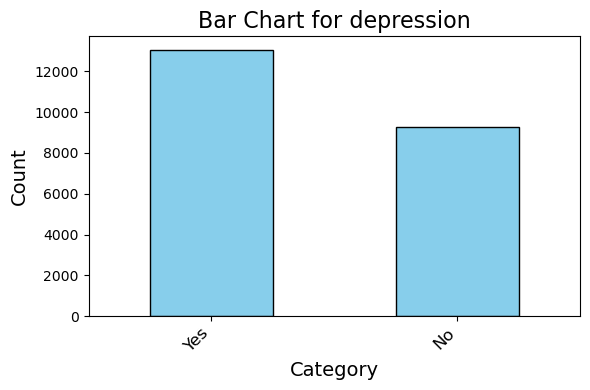

Bar chart saved successfully at: images/depression_bar_chart.png


In [460]:
plot_categorical_bar_chart(dep, 'depression', depression_mapping)

## Drop city, degree, prof and job satisfaction

In [461]:
# dep.drop(columns=['city', 'degree', 'prof','job_sat'], inplace=True)
# dep.head()

# Prepare Data for ML Algorithms

In [462]:
depression = strat_train_set.drop("depression", axis=1) # drop labels for training set
depression_labels = strat_train_set["depression"].copy()
depression.shape

(22320, 17)

# Data Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numerical Features (excluding 'age' since it will be binned)
numerical_features = ['acad_press', 'cgpa', 'study_sat']

# Age Feature (separate handling)
age_feature = ['age']

# Categorical Features (excluding 'sleep_dur' and 'diet_habits' since they will be One-Hot Encoded separately)
categorical_features = ['gender', 'suicidal_thoughts', 'fam_hist_mental', 'sleep_dur', 'diet_habits']

# Pipeline for Age Binning + One-Hot Encoding
age_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),            # Handle missing values
    ('binner', AgeBinner()),                                # Convert age to bins
    ('encoder', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode age bins
])

# Pipeline for Numerical Features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),    # Handle missing values
    ('scaler', MinMaxScaler())                      # Standardize numerical data
])

# Pipeline for One-Hot Encoding of 'sleep_dur' and 'diet_habits'
one_hot_pipeline = ColumnTransformer([
    ('gender', OneHotEncoder(handle_unknown='ignore'), ['gender']),
    ('suicidal_thoughts', OneHotEncoder(handle_unknown='ignore'), ['suicidal_thoughts']),
    ('fam_hist_mental', OneHotEncoder(handle_unknown='ignore'), ['fam_hist_mental']),
    ('sleep_dur', OneHotEncoder(handle_unknown='ignore'), ['sleep_dur']),
    ('diet_habits', OneHotEncoder(handle_unknown='ignore'), ['diet_habits'])
])

# Combine into Full Pipeline
full_pipeline = ColumnTransformer([
    ('age', age_pipeline, age_feature),                             # Age is now categorical and One-Hot Encoded
    ('num', numerical_pipeline, numerical_features),                # Numerical processing
    ('one_hot', one_hot_pipeline, categorical_features)     # One-Hot Encoding
])


In [476]:
depression_prepared = full_pipeline.fit_transform(depression)

# Comparing Different ML Models

In [477]:
ml_results = pd.DataFrame(columns=["Model", "F2 Score", "ROC AUC"])

## Linear Models

### Logistic Regression

In [478]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(depression_prepared, depression_labels)

# Make predictions
depression_predictions = log_reg.predict(depression_prepared)
results = evaluate_model_cross_val(log_reg, "Logistic Regression", depression_prepared, depression_labels)

ml_results = pd.concat([ml_results, results], ignore_index=True)

F2 Score (Emphasizing Recall): 0.8671
ROC AUC:                        0.8981


/var/folders/m1/qxpcclg55hg_8gcmt4vpkrq80000gn/T/ipykernel_24264/145783750.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ml_results = pd.concat([ml_results, results], ignore_index=True)


## Tree-Based Models

### Decision Tree

In [479]:
from sklearn.tree import DecisionTreeClassifier

# Fit the Decision Tree model
dec_tree_clf = DecisionTreeClassifier(random_state=42)
dec_tree_clf.fit(depression_prepared, depression_labels)

# Make predictions
depression_predictions = dec_tree_clf.predict(depression_prepared)
results = evaluate_model_cross_val(dec_tree_clf, "Decision Tree Classifier", depression_prepared, depression_labels)

ml_results = pd.concat([ml_results, results], ignore_index=True)

F2 Score (Emphasizing Recall): 0.7730
ROC AUC:                        0.7318


### Random Forest

In [480]:
from sklearn.ensemble import RandomForestClassifier

# Fit the Random Forest model
random_forest_clf = RandomForestClassifier( random_state=42, n_jobs=-1)
random_forest_clf.fit(depression_prepared, depression_labels)

# Make predictions
depression_predictions = random_forest_clf.predict(depression_prepared)
results = evaluate_model_cross_val(random_forest_clf, "Random Forest Classifier", depression_prepared, depression_labels)

ml_results = pd.concat([ml_results, results], ignore_index=True)

F2 Score (Emphasizing Recall): 0.8246
ROC AUC:                        0.8646


### Gradient Boosting: XGBoost

In [481]:
# from xgboost import XGBClassifier

# # Fit the XGBoost model
# xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')
# xgb_clf.fit(depression_prepared, depression_labels)

# # Make predictions
# depression_predictions = xgb_clf.predict(depression_prepared)
# results = evaluate_model_cross_val(xgb_clf, "XGB Classifier", depression_prepared, depression_labels)

# ml_results = pd.concat([ml_results, results], ignore_index=True)

### Gradient Boosting: LightGBM

In [482]:
# from lightgbm import LGBMClassifier

# # Fit the LightGBM model
# lgbm_clf = LGBMClassifier(random_state=42, verbose=-1)
# lgbm_clf.fit(depression_prepared, depression_labels)

# # Make predictions
# depression_predictions = lgbm_clf.predict(depression_prepared)
# results = evaluate_model_cross_val(lgbm_clf, "LGBM Classifier",  depression_prepared, depression_labels)

# ml_results = pd.concat([ml_results, results], ignore_index=True)

### Gradient Boosting: CatBoost

In [483]:
# from catboost import CatBoostClassifier

# # Fit the CatBoost model
# cat_clf = CatBoostClassifier(random_state=42, verbose=0, iterations=100)
# cat_clf.fit(depression_prepared, depression_labels)

# # Make predictions
# depression_predictions = cat_clf.predict(depression_prepared)
# results = evaluate_model_cross_val(cat_clf, "Cat Boost Classifier", depression_prepared, depression_labels)

# ml_results = pd.concat([ml_results, results], ignore_index=True)

## Bayesian Algorithms

### Gaussian Naive Bayes

In [484]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
gaussian_nb = GaussianNB()
gaussian_nb.fit(depression_prepared, depression_labels)

# Make predictions
depression_predictions = gaussian_nb.predict(depression_prepared)
results = evaluate_model_cross_val(gaussian_nb, "GaussianNB", depression_prepared, depression_labels)

ml_results = pd.concat([ml_results, results], ignore_index=True)

F2 Score (Emphasizing Recall): 0.7566
ROC AUC:                        0.8489


### Multinomial Naive Bayes

In [485]:
from sklearn.naive_bayes import MultinomialNB

# Multinomial Naive Bayes
multinomial_nb = MultinomialNB()
multinomial_nb.fit(depression_prepared, depression_labels)

# Make predictions
depression_predictions = multinomial_nb.predict(depression_prepared)
results = evaluate_model_cross_val(multinomial_nb, "MultinomialNB", depression_prepared, depression_labels)

ml_results = pd.concat([ml_results, results], ignore_index=True)

F2 Score (Emphasizing Recall): 0.8437
ROC AUC:                        0.8538


### Bernoulli Naive Bayes

In [486]:
from sklearn.naive_bayes import BernoulliNB

# Bernoulli Naive Bayes
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(depression_prepared, depression_labels)

# Make predictions
depression_predictions = bernoulli_nb.predict(depression_prepared)
results = evaluate_model_cross_val(bernoulli_nb, "BernoulliNB", depression_prepared, depression_labels)

ml_results = pd.concat([ml_results, results], ignore_index=True)

F2 Score (Emphasizing Recall): 0.8399
ROC AUC:                        0.8354


## Compare ML models performance

In [487]:
ml_results.head(20)

,Model,F2 Score,ROC AUC
0,Logistic Regression,0.867131,0.898120
1,Decision Tree Classifier,0.772978,0.731823
2,Random Forest Classifier,0.824601,0.864644
3,GaussianNB,0.756610,0.848914
4,MultinomialNB,0.843705,0.853825
5,BernoulliNB,0.839949,0.835362


In [488]:
ml_results_sorted = ml_results.sort_values(by="F2 Score", ascending=False)
# ml_results_sorted = ml_results_sorted.drop(columns=['Precision', 'F1 Score', 'ROC AUC'])
ml_results_sorted.head(10)

,Model,F2 Score,ROC AUC
0,Logistic Regression,0.867131,0.898120
4,MultinomialNB,0.843705,0.853825
5,BernoulliNB,0.839949,0.835362
2,Random Forest Classifier,0.824601,0.864644
1,Decision Tree Classifier,0.772978,0.731823
3,GaussianNB,0.756610,0.848914


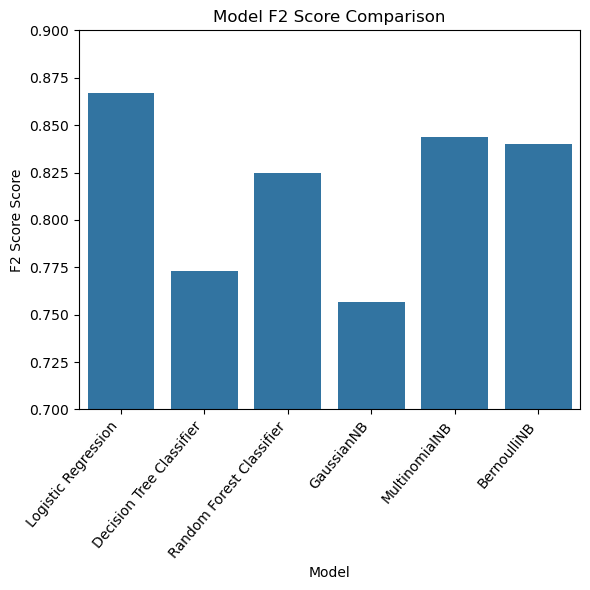

In [489]:
# Reshape the data to long format
df_melted = ml_results.melt(
    id_vars='Model', 
    var_name='Metric', 
    value_name='Value'
)

# Filter only F2 Score
df_f2_score= df_melted[df_melted['Metric'] == 'F2 Score']

# Plot bar chart for F2 Score
plt.figure(figsize=(6, 6))
sns.barplot(
    data=df_f2_score,
    x='Model', 
    y='Value'
)

# Customize plot
plt.ylim(0.7, 0.9)
plt.xticks(rotation=50, ha='right')
plt.title('Model F2 Score Comparison')
plt.ylabel('F2 Score Score')
plt.tight_layout()
plt.show()
